In [12]:
import numpy as np
import ebisim as eb
from ebisim.simulation._radial_dist import radial_potential_nonuniform_grid
import matplotlib.pyplot as plt

In [2]:
R_E = 280e-6
R_DT = 7e-3
V_AX = 30
CUR = 70e-3
E_KIN = 5000
LEN = 80e-3
B_0 = 5.5
r = eb.Device.get(CUR, E_KIN, R_E, LEN, V_AX, B_0, R_DT, r_dt_bar=3e-3, n_grid=420, fwhm=15).rad_grid

In [16]:
r_e = 280e-6
l_e = -2e11 * eb.Q_E
rho_e = np.full_like(r, l_e/(eb.PI * r_e**2))
rho_e[r>r_e] = 0

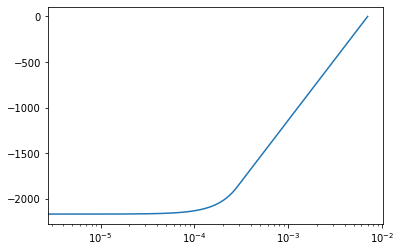

In [18]:
phi = radial_potential_nonuniform_grid(r, rho_e)
plt.semilogx(r, phi)

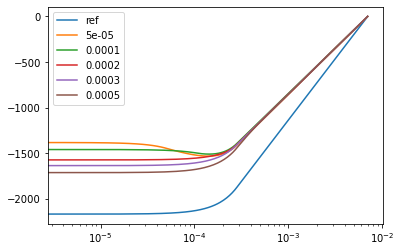

In [23]:
phi = radial_potential_nonuniform_grid(r, rho_e)
plt.semilogx(r, phi, label="ref")
l_i = 5e10 * eb.Q_E
for r_i in [50e-6, 100e-6, 200e-6, 300e-6, 500e-6]:
    rho_i = np.full_like(r, l_i/(eb.PI * r_i**2))
    rho_i[r>r_i] = 0
    phi = radial_potential_nonuniform_grid(r, rho_e+rho_i)
    plt.semilogx(r, phi, label=str(r_i))
plt.legend()